# Module 8 Live Coding Assignment:
## Experimental Desgin, Casual Research, and targeting Analysis

#### Dempsey Wade

In [1]:
import numpy as np 
import pandas as pd

## Q1

#### Learning about the data you are working with is essential when performing exploratory analysis. Import the data set heart.csv and assign to a dataframe “df”. Use the modules “info”, “describe”, and “shape” to retrieve information about the database. Get the cholesterol (column “chol”) distribution across the different values of “cp”. Save your results in a dataframe named “df1”. Print to screen the first 5 rows of “df1”.

In [118]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [120]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [121]:
df.shape

(303, 14)

<bound method NDFrame.head of     chol
cp      
0    143
1     50
2     87
3     23>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d326408d0>]],
      dtype=object)

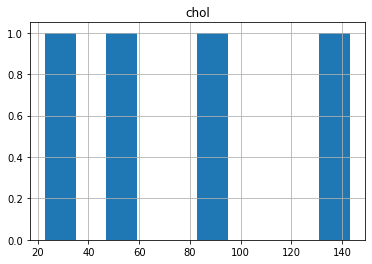

In [122]:
df1 = df.groupby('cp')[['chol']].count()
print(df1.head)
df1.hist(column = 'chol')

## Q2
#### Using the same dataframe as in the previous question, get the composition of different resting heartbeats (i.e.,“restecg”) in each “cp” group. Save your results in a dataframe called “df2”. Make sure your resulting database has “cp” and “resteg” as indexes and the column “sex”. Print to screen the first 5 rows of “df2”.

In [123]:
df2 = df.groupby(['cp','restecg']).count()[['sex']]

In [124]:
df2.head()

sex
cp restecg     
0  0         78
   1         62
   2          3
1  0         19
   1         31

## Q3
#### Using the original dataframe from Question 1, find the slope distributions across all different “cp” groups. Name the the final dataframe “df3”. Make sure your resulting database as “slope” as indexes, and MultiIndex column for “cp” and “sex” . Print to screen the first 5 rows of “df3”.

In [132]:
df3 = df.groupby(['cp','slope']).count()[['sex']].unstack('cp')
df3

sex            
cp      0   1   2   3
slope                
0      11   2   5   3
1      84  12  33  11
2      48  36  49   9

## Q4
#### Using the dataframe “df”, create a two-sided T-test for the null hypothesis such that two “cp” values 1 and 2 have identical average (expected) values. Do not assume equal population variance. Save your results in two variables called “t1” and “t2”. Hint: Use the module “stats.ttest ind” for this Welch’s t-test and the “sex” variable as values. Next, repeat the same exercise as above, but assume equal variance across the population. Assign your expected values to “te1” and “te2”, respectively. Print all the results you have found to screen.

In [133]:
from scipy import stats

In [140]:
t1, p1 = stats.ttest_ind(df.loc[df['cp'] == 1, 'sex'].values,
        df.loc[df['cp'] == 2, 'sex'].values, 
        equal_var = False)

In [141]:
t1, p1

(0.488489435798016, 0.626234552897734)

In [142]:
df.loc[df['cp'] == 1]['sex'].mean()

0.64

In [143]:
df.loc[df['cp'] == 2]['sex'].mean()

0.5977011494252874

Because p1 is > 0.05, we fail to reject the null hypothesis

## Q5
#### Using the dataframe “df”, create a boolean variable for whether or not a person has a threshold of beats per minute (“trestbps”) lower than 125. Name this variable “low trest” and plot your results in a histogram.

In [166]:
import plotly.express as px

In [173]:
df['low_trest'] = df['trestbps'].apply(lambda x: 1 if x < 125 else 0)
df['low_trest'].head()

0    0
1    0
2    0
3    1
4    1
Name: low_trest, dtype: int64

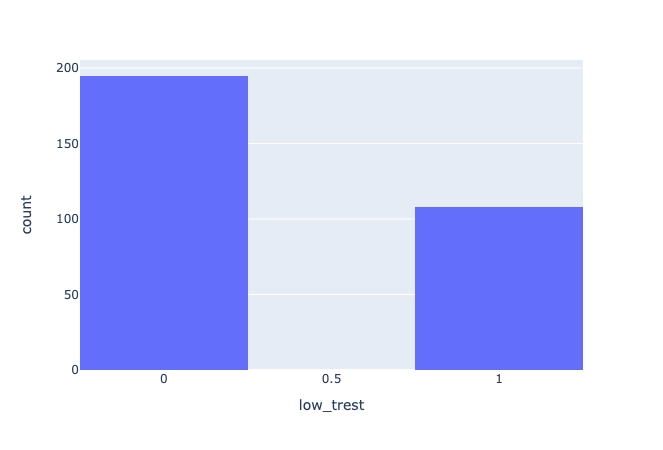

In [174]:
px.histogram(df, 'low_trest', nbins = 3)

## Q6
#### Similarly to what you have done in the previous question, create another boolean variable “high tach” that has value 1 if the person has a “thalach” value greater than 160. Show your results in a histogram.

In [175]:
df['high_tach'] = df['thalach'].apply(lambda x: 1 if x >160 else 0)
df['high_tach'].head()

0    0
1    1
2    1
3    1
4    1
Name: high_tach, dtype: int64

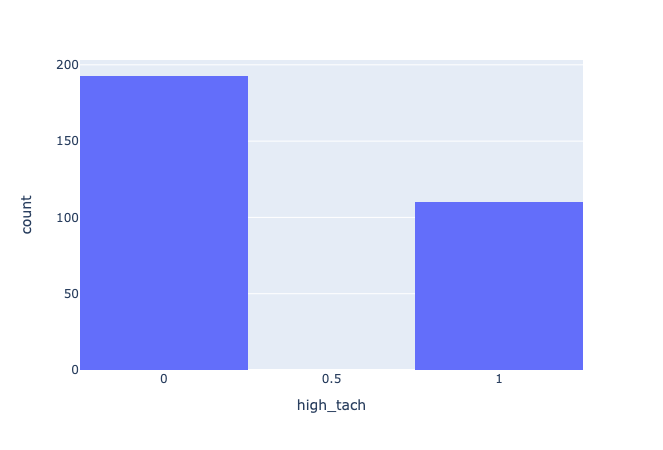

In [176]:
px.histogram(df, 'high_tach', nbins = 3)